# import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read dataset

In [4]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.drop('Gender', axis = 1, inplace=True)
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [6]:
df.isna().sum()

Height    0
Weight    0
dtype: int64

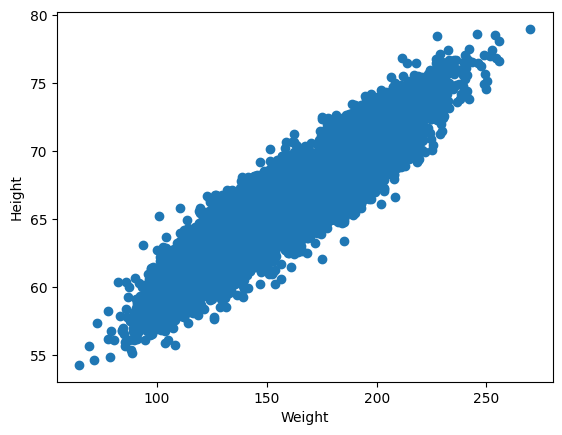

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel('Height')
plt.show()

In [8]:
df.duplicated().sum()

0

# divide dataset into dependant and independant features

In [9]:
X = df[['Weight']] # independant
y = df[['Height']] # dependant

# train test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# scale the data - standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the model on the scaled data

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [15]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [16]:
lr.coef_

array([[3.55479288]])

In [18]:
lr.intercept_

array([66.35968141])

best fit line

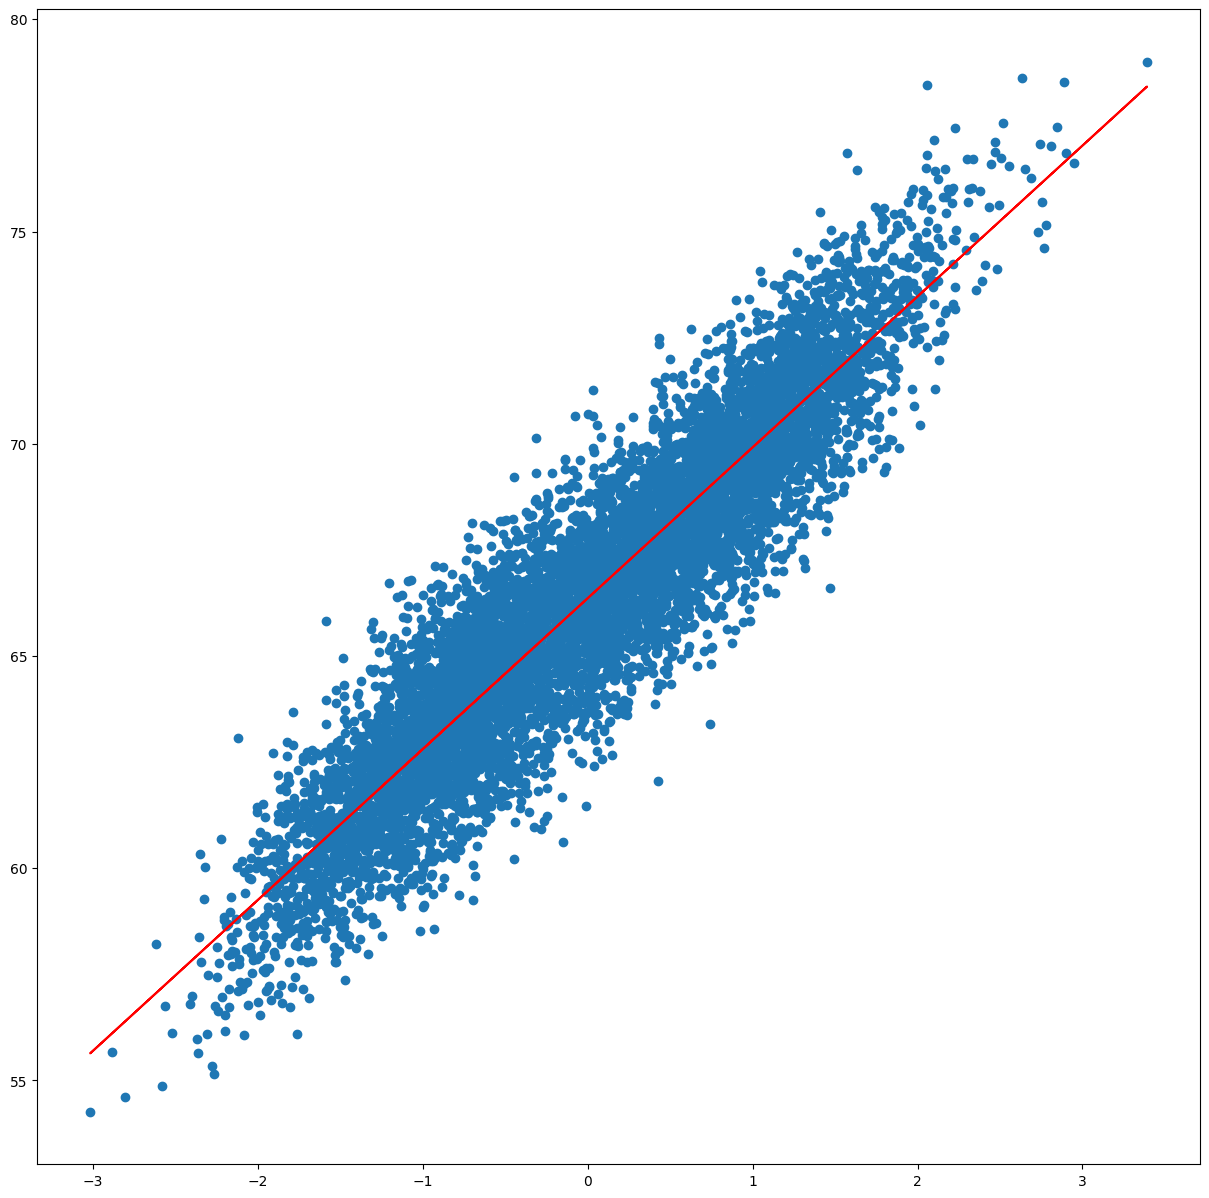

In [29]:
plt.figure(figsize=(15,15))
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled, lr.predict(X_train_scaled), 'r')

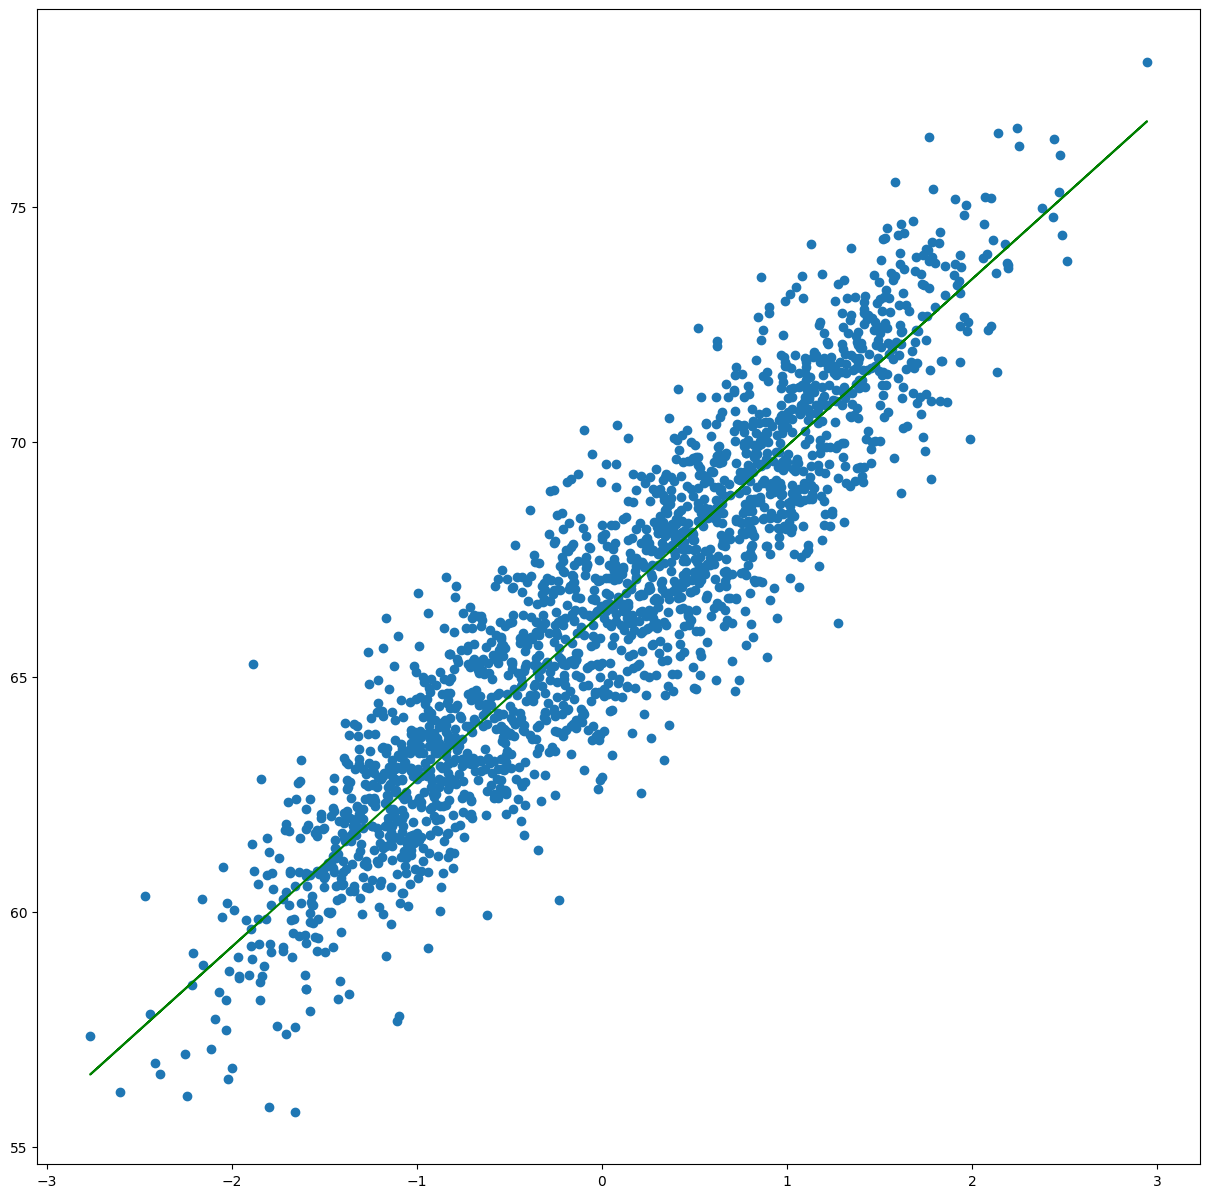

In [28]:
plt.figure(figsize=(15,15))
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled, lr.predict(X_test_scaled),'g')

# performance metrics

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mae = mean_absolute_error(y_test ,lr.predict(X_test_scaled))
mse = mean_squared_error(y_test , lr.predict(X_test_scaled))
rmse = root_mean_squared_error(y_test, lr.predict(X_test_scaled))

In [33]:
print(mae)
print(mse)
print(rmse)

1.1588656330992098
2.112361948474147
1.4533966934303062


In [34]:
from sklearn.metrics import r2_score

score  = r2_score(y_test, lr.predict(X_test_scaled))
print(score)

0.8578120230894554


adjusted r square

In [35]:
adj = 1- (1-score) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [36]:
print(adj)

0.8577408579358465
